# Практическое занятие 6
## Вариант 11

### Задание 2

**Задача о назначениях** с пятью исследователями и четырьмя проектами не поддается решению с помощью **графического метода**, так как это задача **линейного программирования с более чем двумя переменными**. Графический метод применим только к задачам с **двумя переменными**, где решения могут быть представлены на **двумерной плоскости**.



### Задание 3

![](61.png)

In [1]:
import pandas as pd
from scipy.optimize import linear_sum_assignment

# Данные из таблицы
data = {
	'Адаме': [80, 120, 60, 104],
	'Браун': [72, 144, 48, 110],
	'Карр': [96, 148, 72, 120],
	'Дай': [60, 108, 52, 92],
	'Иване': [64, 140, 60, 96]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Применение венгерского метода
row_ind, col_ind = linear_sum_assignment(df)

# Вывод результатов
assignment = df.columns[col_ind]
total_days = df.values[row_ind, col_ind].sum()
assigned_days = df.values[row_ind, col_ind]

assignment, total_days, assigned_days


(Index(['Иване', 'Дай', 'Браун', 'Адаме'], dtype='object'),
 324,
 array([ 64, 108,  48, 104], dtype=int64))

#### Вывод

---

**Оптимальное распределение научных руководителей по проектам:**

- **Иване** - Проект 1 _(64 дня)_
- **Дай** - Проект 2 _(108 дней)_
- **Браун** - Проект 3 _(48 дней)_
- **Адаме** - Проект 4 _(104 дня)_

**Общее время**, необходимое для завершения всех четырех проектов, составляет **324 дня**.

---

##### Предпочтения Ученых и Назначения

- Ученые **Браун**, **Карр** и **Дай** предпочитают проекты 2 и 3.
  - **Браун** назначен на проект 3, что соответствует его предпочтениям.
  - **Дай** назначен на проект 2, что также соответствует его предпочтениям.

- Ученые **Адаме** и **Иване** предпочитают проекты 1 и 4.
  - **Адаме** назначен на проект 4, что соответствует его предпочтениям.
  - **Иване** назначен на проект 1, что также соответствует его предпочтениям.

---

**Вывод**: Данный вариант распределения ученых является оптимальным как с точки зрения минимизации времени, так и с учетом предпочтений ученых.


### Задание 4

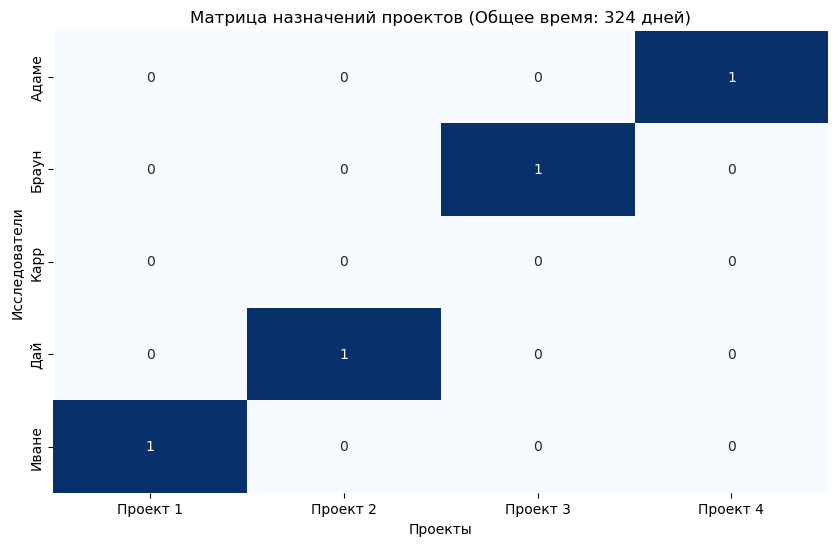

([(0, 3), (1, 2), (3, 1), (4, 0)], 324)

In [4]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns

# Матрица времени, требуемого каждым исследователем для каждого проекта
time_matrix = np.array([
	[80, 120, 60, 104],  # Адаме
	[72, 144, 48, 110],  # Браун
	[96, 148, 72, 120],  # Карр
	[60, 108, 52, 92],   # Дай
	[64, 140, 60, 96]    # Иване
])

# Решение задачи о назначении (минимизация общего времени)
row_ind, col_ind = linear_sum_assignment(time_matrix)

# Результаты: назначения и общее время
assignments = list(zip(row_ind, col_ind))
total_time = time_matrix[row_ind, col_ind].sum()

assignment_matrix = np.zeros_like(time_matrix)

# Теперь установим 1 в ячейках, соответствующих оптимальным назначениям
for researcher, project in assignments:
	assignment_matrix[researcher, project] = 1

# Теперь визуализируем матрицу назначений
plt.figure(figsize=(10, 6))
sns.heatmap(assignment_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[f"Проект {i+1}" for i in range(4)], yticklabels=["Адаме", "Браун", "Карр", "Дай", "Иване"])
plt.title(f"Матрица назначений проектов (Общее время: {total_time} дней)")
plt.xlabel("Проекты")
plt.ylabel("Исследователи")
plt.show()

assignments, total_time


**Результат аналогичный прошлому методу**


#### Оптимальное Назначение Научных Руководителей Проектов

Из полученного решения видно, что:

- **Адаме** (предпочитает проекты 1 и 4) назначен на **проект 4**, что соответствует его предпочтениям.
- **Браун** (предпочитает проекты 2 и 3) назначен на **проект 3**, что также соответствует его предпочтениям.
- **Дай** (предпочитает проекты 2 и 3) назначен на **проект 2**, что удовлетворяет его предпочтениям.
- **Иване** (предпочитает проекты 1 и 4) назначен на **проект 1**, что соответствует его предпочтениям.

Общее время, необходимое для завершения всех проектов при этом назначении, составляет **324 дня**.

Таким образом, данный вариант назначения является не только оптимальным с точки зрения минимизации времени, но и учитывает предпочтения исследователей.


### Задание 3, 4

![](62.png)

In [2]:
import numpy as np

# Исходные данные
cost_matrix = np.array([
	[6, 4, 4, 5],
	[6, 9, 5, 8],
	[8, 2, 10, 6]
])
supply = np.array([200, 300, 100])
demand = np.array([450, 250, 100, 100])

# Расчет общего предложения и спроса
total_supply = np.sum(supply)
total_demand = np.sum(demand)

print(f'Общий спрос: {total_demand}, общее предложение: {total_supply}')

Общий спрос: 900, общее предложение: 600


#### Анализ спроса и предложения

- Общее предложение (мощность поставщиков): **600**
- Общий спрос (потребность потребителей): **900**

**Необходим фиктивный поставщик, так как спрос больше предложения.**

In [3]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Исходные данные
cost_matrix = np.array([
	[6, 4, 4, 5],
	[6, 9, 5, 8],
	[8, 2, 10, 6]
])
supply = np.array([200, 300, 100])
demand = np.array([450, 250, 100, 100])

# Выбор стоимости для фиктивного поставщика
dummy_cost = 5

# Проверка необходимости добавления фиктивного поставщика
if total_demand > total_supply:
	# Добавление фиктивного поставщика
	dummy_rows = np.full((total_demand - total_supply, cost_matrix.shape[1]), dummy_cost)
	extended_cost_matrix = np.vstack((cost_matrix, dummy_rows))
	extended_supply = np.append(supply, total_demand - total_supply)
else:
	extended_cost_matrix = cost_matrix
	extended_supply = supply

# Решение задачи
row_ind, col_ind = linear_sum_assignment(extended_cost_matrix)

# Оптимальная стоимость и распределение
optimal_cost = extended_cost_matrix[row_ind, col_ind].sum()
assignments = list(zip(row_ind, col_ind))

# Вывод результатов
print(f'Цена фиктивного поставщика: {dummy_cost}')
optimal_cost, assignments



Цена фиктивного поставщика: 5


(16, [(0, 2), (2, 1), (3, 0), (4, 3)])

#### Результаты Решения Транспортной Задачи

**Оптимальная стоимость:** *16* единиц, при цене **фиктивного поставщика** *5* единиц.

#### Распределение Ресурсов:
1. **Поставщик 1** -> **Потребитель 3**
2. **Поставщик 3** -> **Потребитель 2**
3. **Фиктивный Поставщик** -> **Потребитель 1** (Спрос Потребителя 1 не полностью удовлетворён)
4. **Фиктивный Поставщик** -> **Потребитель 4** (Спрос Потребителя 4 не полностью удовлетворён)

Эти результаты показывают оптимальное распределение доступных ресурсов между потребителями для минимизации общей стоимости перевозок, учитывая ограничения по спросу и предложению. Фиктивные поставщики включены в распределение для балансировки задачи, когда спрос превышает предложение.